# MMQ para dados climáticos

In [217]:
#imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import scipy.stats as sp

In [218]:
#importar dados
df = pd.read_excel('Data/final_data.xlsx')

In [219]:
def treinar_modelo(x_, y_):
    x_ = sm.add_constant(x_)
    model = sm.OLS(y_,x_)
    res = model.fit()
    return res   

In [220]:
def plotgrafico(xlabel, ylabel, label, linha):
    graf, eix = plt.subplots()
    eix.scatter(x,y, color = 'black')
    eix.plot(x, linha , label = label, color = 'red')
    eix.set_ylabel(ylabel)
    eix.set_xlabel(xlabel)
    eix.set_title('Grafico')
    eix.legend()
    graf.show()

In [221]:
#Previsão
array_prev = [2034.0410, 2034.1257, 2034.2049, 2034.2896, 2034.3716, 2034.4563, 2034.5383, 2034.6230, 2034.7077, 2034.7896, 2034.8743, 2034.9563]

## CO2xTempo

In [222]:
#definir variáveis x e y
y = np.array(df['Co2 ppm'])
x = np.array(df['decimal date'])



In [223]:
#teste da distribuição normal
sp.shapiro(y)

ShapiroResult(statistic=0.9412708282470703, pvalue=5.25531136560988e-17)

### Linear

In [239]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = x
y_ = y 
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.338e+04
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:14:18   Log-Likelihood:                -2313.7
No. Observations:                 780   AIC:                             4631.
Df Residuals:                     778   BIC:                             4641.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2907.5485     17.881   -162.606      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


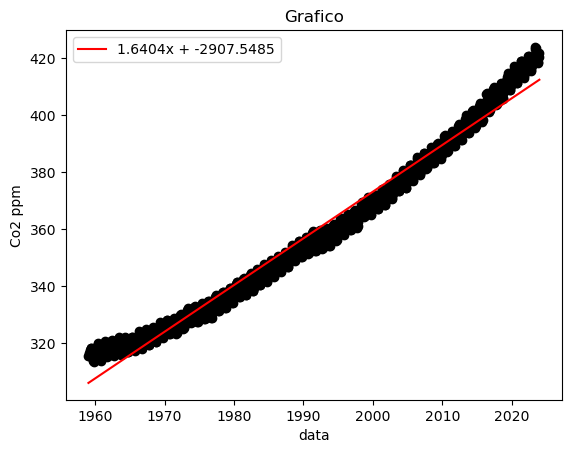

In [240]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}x + {round(res.params[0],4)}'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

### Logarítmico

In [237]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = np.log(x)
y_ = y
res = treinar_modelo(x_,y_)
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 3.178e+04
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:14:13   Log-Likelihood:                -2332.5
No. Observations:                 780   AIC:                             4669.
Df Residuals:                     778   BIC:                             4678.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.444e+04    139.130   -175.675      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


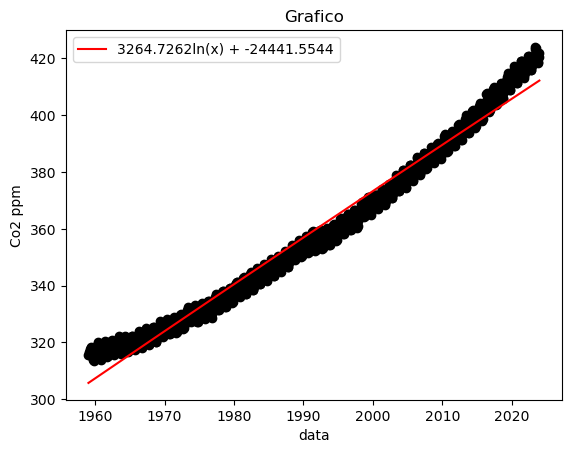

In [238]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) + {round(res.params[0],4)}'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

### Exponencial

In [233]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = x
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 5.286e+04
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:08:33   Log-Likelihood:                 2459.6
No. Observations:                 780   AIC:                            -4915.
Df Residuals:                     778   BIC:                            -4906.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.1598      0.039    -80.357      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


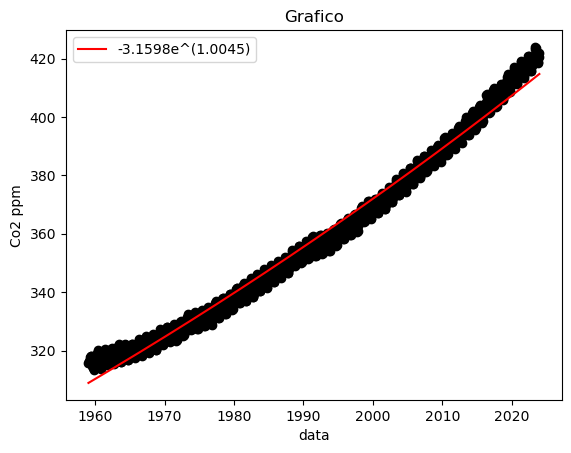

In [236]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[0],4)}e^({round( np.exp(res.params[1]) ,4)})'
funApro = np.exp(res.params[0]) * np.exp(res.params[1] * x)
plotgrafico('data', 'Co2 ppm', equacaolabel, funApro  )

### Potencial

In [241]:
#Preparar model e treiná-lo, com teste t de student para significância
x_ = np.log(x)
y_ = np.log(y)
res = treinar_modelo(x_,y_)
print(res.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 4.998e+04
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:14:55   Log-Likelihood:                 2438.1
No. Observations:                 780   AIC:                            -4872.
Df Residuals:                     778   BIC:                            -4863.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -62.7609      0.307   -204.416      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


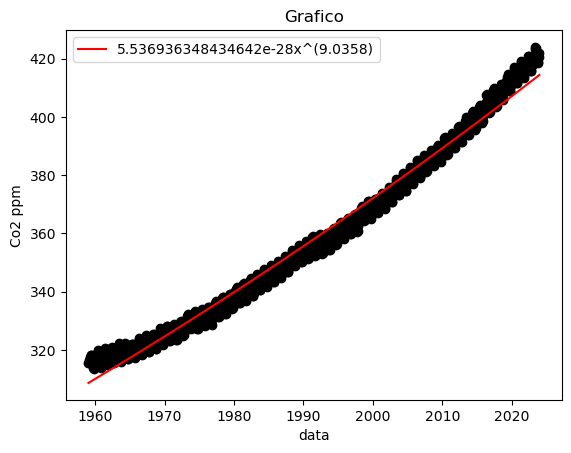

In [245]:
#Equação e Gráfico
equacaolabel = f'{np.exp(res.params[0])}x^({round(res.params[1],4)})'
funApro = np.exp(res.params[0]) * (x ** res.params[1])
plotgrafico('data', 'Co2 ppm', equacaolabel, funApro  )

### Polinomial

In [246]:
#Preparar model e treiná-lo, com teste t de student para significância
y_ = y
x_ = np.column_stack((x, x**2))
res = treinar_modelo(x_,y_)
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 7.540e+04
Date:                Thu, 15 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:30:05   Log-Likelihood:                -1732.1
No. Observations:                 780   AIC:                             3470.
Df Residuals:                     777   BIC:                             3484.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.918e+04   1007.098     48.835      0.0

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


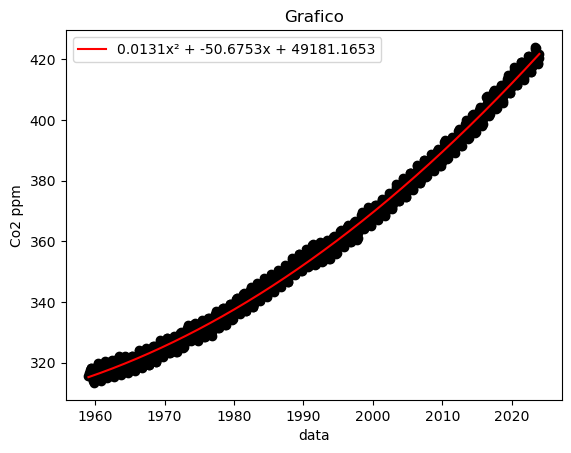

In [247]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[2],4)}x² + {round(res.params[1],4)}x + {round(res.params[0],4)}'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

## Anomomalias de Temperatura x Tempo

In [ ]:
#definir variáveis x e y
y = df['temperature anomalies'].values
x = df['decimal date'].values

In [ ]:
#teste da distribuição normal
sp.shapiro(y)

### Linear

In [ ]:
x_ = x
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

In [ ]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}x + {round(res.params[0],4)}'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

### Logarítmico

In [ ]:
x_ = np.log(x)
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

In [ ]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) + {round(res.params[0],4)}'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

### Exponencial

In [ ]:
#Normalização
yNorm = np.abs(np.min(y)) + 1
y =  y + yNorm

y_ = np.log(y)
x_ = x

res = treinar_modelo(x_, y_)
print(res.summary())

### Potencial

In [ ]:
#Normalizar
yNorm = np.abs(np.min(y)) + 1
y =  y + yNorm

x_ = np.log(x)
y_ = np.log(y)

res = treinar_modelo(x_, y_)
print(res.summary())

### Polinomial

In [ ]:
y_ = y
x_ = np.column_stack((x, x**2))
res = treinar_modelo(x_,y_)
print(res.summary())

## Anomomalias de Temperatura x Co2

In [ ]:
y = df['temperature anomalies']
x = df['Co2 ppm']

### Linear

In [ ]:
x_ = x
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

In [ ]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}x + ({round(res.params[0],4)})'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

### Logarítmico

In [ ]:
x_ = np.log(x)
y_ = y
res = treinar_modelo(x_, y_)
print(res.summary())

In [ ]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) + ({round(res.params[0],4)})'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

### Exponencial

In [ ]:
#Normalização
yNorm = np.abs(np.min(y)) + 1
y =  y + yNorm

y_ = np.log(y)
x_ = x

res = treinar_modelo(x_, y_)
print(res.summary())

In [ ]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[1],4)}ln(x) + ({round( np.exp(res.params[0]) ,4)})'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )

### Potencial

In [ ]:
#Normalizar
yNorm = np.abs(np.min(y)) + 1
y =  y + yNorm

x_ = np.log(x)
y_ = np.log(y)

res = treinar_modelo(x_, y_)
print(res.summary())

### Polinomial

In [ ]:
y_ = y
x_ = np.column_stack((x, x**2))
res = treinar_modelo(x_,y_)
print(res.summary())

/tmp/ipykernel_4876/3215087556.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  graf.show()


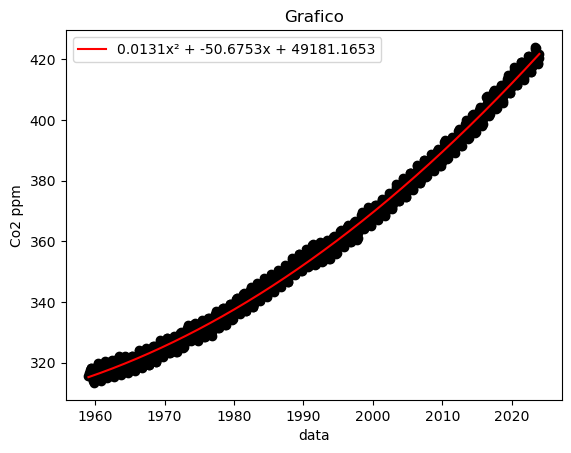

In [247]:
#Equação e Gráfico
equacaolabel = f'{round(res.params[2],4)}x² + {round(res.params[1],4)}x + {round(res.params[0],4)}'
plotgrafico('data', 'Co2 ppm', equacaolabel, res.fittedvalues )